### Exploratory Analysis of House Prices

#### 1. **Initial Data Exploration**
- The dataset contains **2,000 records** of house prices, with features such as **Number of Bedrooms**, **Number of bathrooms**, **Square Footage**, **location**, **condition**, **garage presence**, and **year built**.
- Data inspection revealed that there are no missing values in the dataset, particularly in the **'Bathroom'** column, which indicates that every house in the dataset specifies whether it has a garage or not.

#### 2. **Distribution of Houses Based on Bathroom Count**
- The **distribution of houses based on bathroom count:** There are **461** houses with **1 bathroom**, **494** houses with **2 bathrooms**, **524** houses with **3 bathrooms**, **521** houses with **4 bathrooms**,
- A pie chart was used to display the proportion of houses based on bathroom count. The visualization indicates that the difference is relatively small, showing nearly an even split.

#### 3. **Impact of Bathroom Count on House Prices**
- The average house prices **based on bathroom counts** were compared using summary statistics and visualizations:
  - Houses with 1 bathroom tend to have a slightly higher average price compared to rest.
  - A bar chart depicting the **average house price** based on bathroom count confirmed this observation.
  - The one-way ANOVA test for garage presence showed that the **p-value** was **0.13**, suggesting that the difference in average prices is not statistically significant at the 95% confidence level. Therefore, having more bathrooms may not have a strong effect on house prices in this dataset.

#### 4. **Distribution of House Prices based on bathroom count**
- A **histogram** comparing the distribution of house prices for houses with 1, 2,3 and 4 bathrooms shows that the distributions are similar, with house prices spread across all price ranges.

#### 5. **Average House Price Over Time: Based on bathroom count**
- A **line plot** was used to examine how average house prices have changed over time (based on the year built) for houses with 1, 2, 3 and 4 bathrooms.
  - The plot shows that average prices fluctuate significantly over the years for each category, with no clear or consistent trend of one category having consistently higher prices than the other.

#### 6. **Outliers in House Prices**
- Outliers in house prices were identified using the **Interquartile Range (IQR)** method:
  - There were **no outliers detected based on bathroom count**.

#### 7. **Correlation between Bathroom Count and House Prices**
- A scatter plot was created to explore the relationship between **bathroom count** and **house prices**.
  - A linear regression line was added to the scatter plot, almost showing a **horizontal line**, which corresponds to a **correlation coefficient of -0.02**.
  - This indicates that there is **no correlation** between garage presence and house prices.
  - The **p-value** was **0.13**, meaning that the result is not statistically significant.

#### 8. **Analysis by Location**
- The dataset was further analyzed to understand the impact of **location** on house prices:
  - The distribution of houses by location (**Downtown, Rural, Suburban, and Urban**) was visualized using a bar chart that included bathroom counts.
  - In terms of bathroom counts across locations, the percentage distribution showed no significant difference between locations regarding the bathroom count.

#### 9. **Overall Observations**
- The analysis indicates that **bathroom count** has a weak influence on house prices, as evidenced by the **slightly higher average prices** for houses with 1 bathroom, though not statistically significant.
- This dataset does not reveal any major factors that lead to statistically significant variations in house prices, suggesting that other variables (e.g., house condition, area, or year built) might play a more substantial role in determining house prices.

### Conclusion
The analysis of this dataset suggests that **bathroom count** does not have a significant influence on house prices, based on statistical tests and visualizations.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import f_oneway
from pathlib import Path
from sklearn.linear_model import LinearRegression



In [6]:
# Read House Price Data File and store into Pandas DataFrames
house_data = pd.read_csv("House Price Prediction Dataset.csv")


In [7]:
# Display the first few rows of the dataset 
house_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
# Count the total number of IDs
total_ids = house_data['Id'].count()

# Count the number of unique IDs
unique_ids = house_data['Id'].nunique()

# Print the results
print(f"Total number of IDs: {total_ids}")
print(f"Number of unique IDs: {unique_ids}")

# Check if there are duplicate IDs
duplicate_ids = total_ids - unique_ids
print(f"Number of duplicate IDs: {duplicate_ids}")


Total number of IDs: 2000
Number of unique IDs: 2000
Number of duplicate IDs: 0


In [9]:
# Display information about the dataset, including data types and non-null counts
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
# Count the number of bathrooms in houses 
bathroom_counts = house_data['Bathrooms'].value_counts()

# Display the results
print(bathroom_counts)


Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64


In [11]:
# Using the aggregation method to generate summary statistics for house prices by bathroom count
bathroom_price_summary = house_data.groupby('Bathrooms')['Price'].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics
bathroom_price_summary


,mean,median,std,min,max
Bathrooms,,,,,
1,558757.752711,564922.0,270835.499640,51082,999453
2,516589.876518,514412.5,285602.943886,50005,999656
3,540201.713740,530710.0,275954.843455,53657,997719
4,536478.481766,553575.0,272235.651385,51845,996931


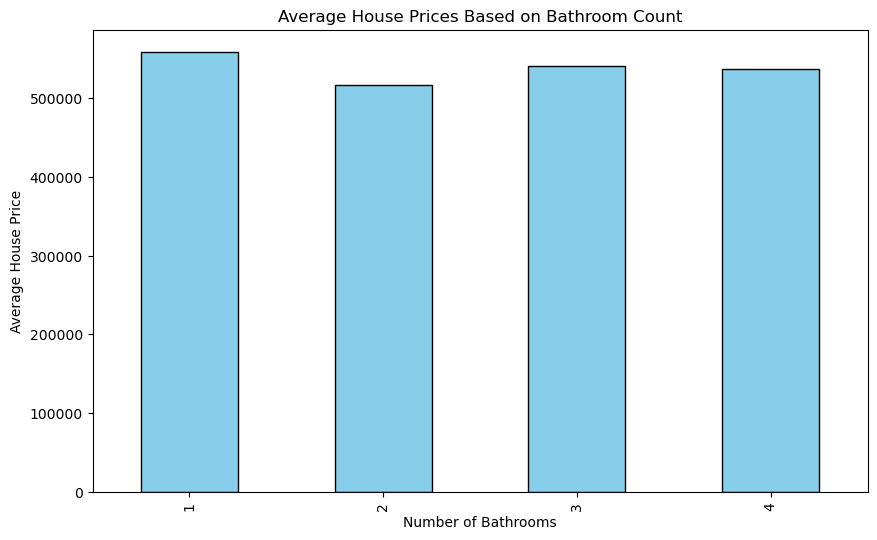

In [12]:
# Plotting the average house prices based on bathroom count
plt.figure(figsize=(10, 6))
bathroom_price_summary['mean'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average House Prices Based on Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average House Price')

# Show the plot
plt.show()


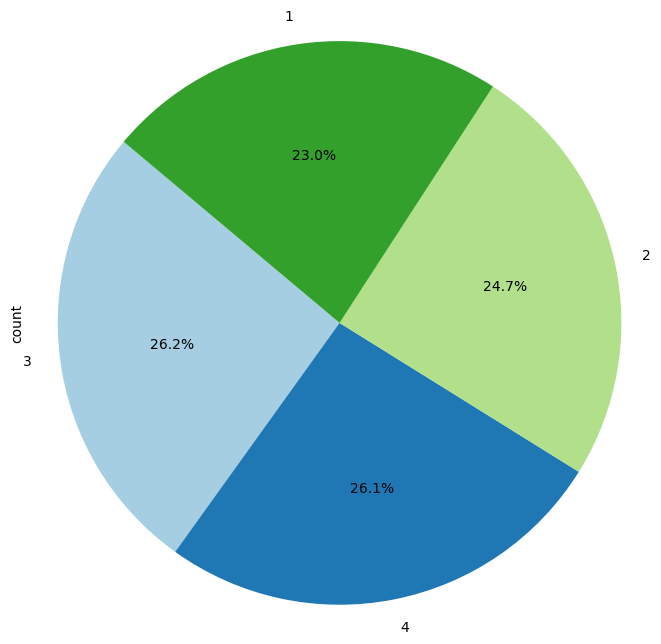

In [13]:
# Get the count of houses based on the number of bathrooms
bathroom_counts = house_data['Bathrooms'].value_counts()

# Make the pie chart based on bathroom count
plt.figure(figsize=(8, 8))
bathroom_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(bathroom_counts))))

# Make the axis equal to ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()


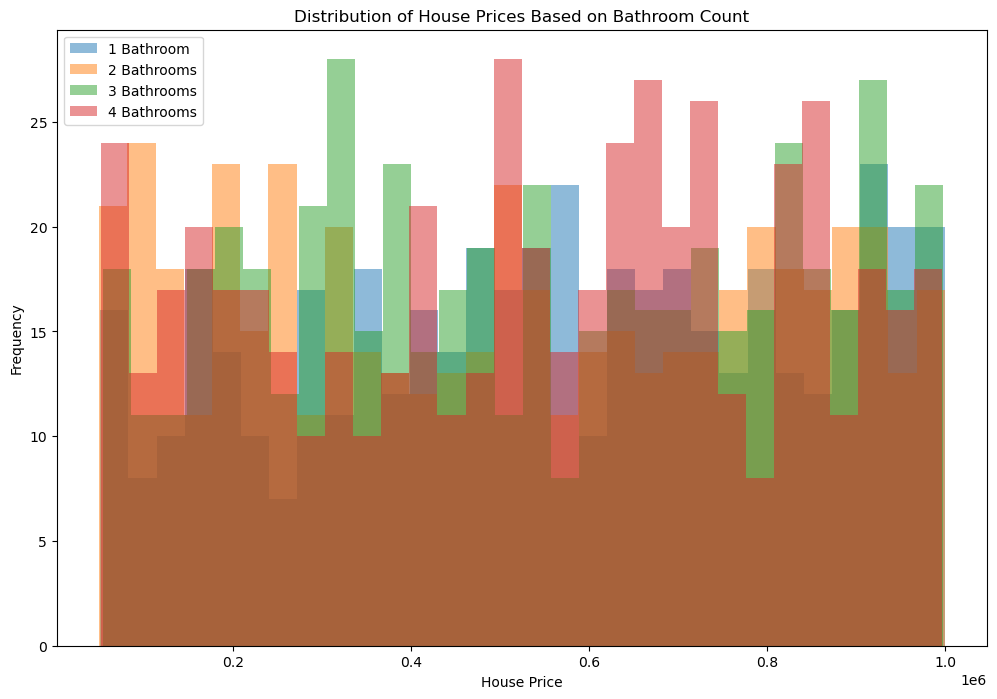

In [14]:
# Plotting a histogram to compare the distribution of house prices based on bathroom count

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot a histogram for house prices for 1 bathroom houses
plt.hist(house_data[house_data['Bathrooms'] == 1]['Price'], bins=30, alpha=0.5, label='1 Bathroom')

# Plot a histogram for house prices for 2 bathroom houses
plt.hist(house_data[house_data['Bathrooms'] == 2]['Price'], bins=30, alpha=0.5, label='2 Bathrooms')

# Plot a histogram for house prices for 3 bathroom houses
plt.hist(house_data[house_data['Bathrooms'] == 3]['Price'], bins=30, alpha=0.5, label='3 Bathrooms')

# Plot a histogram for house prices for 4 bathroom houses
plt.hist(house_data[house_data['Bathrooms'] == 4]['Price'], bins=30, alpha=0.5, label='4 Bathrooms')

# Add title and labels
plt.title('Distribution of House Prices Based on Bathroom Count')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Add legend to indicate which distribution represents houses based on bathroom count
plt.legend()

# Display the plot
plt.show()

In [17]:
# Calculate Quartiles and Identify Outliers for House Prices Based on Bathroom Count

# Calculate the 25th, 50th (median), and 75th percentiles for house prices based on bathroom count
quartiles = house_data.groupby('Bathrooms')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# Display the quartiles for '1 bathroom', '2 bathrooms', '3 bathrooms' and '4 bathrooms' groups
print("Quartiles for house prices based on bathroom count:")
print(quartiles)

# Calculate the Interquartile Range (IQR)
iqr = quartiles[0.75] - quartiles[0.25]

# Calculate lower and upper bounds for detecting outliers
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

# Display the IQR, lower and upper bounds
print("\nInterquartile Range (IQR) for house prices based on bathroom count:")
print(iqr)
print("\nLower and upper bounds for detecting outliers:")
print("Lower bounds:\n", lower_bound)
print("Upper bounds:\n", upper_bound)

# Identify potential outliers for '1 bathroom' houses
outliers_1_bath = house_data[(house_data['Bathrooms'] == 1) & ((house_data['Price'] < lower_bound[1]) | (house_data['Price'] > upper_bound[1]))]

# Identify potential outliers for '2 bathrooms' houses
outliers_2_bath = house_data[(house_data['Bathrooms'] == 2) & ((house_data['Price'] < lower_bound[2]) | (house_data['Price'] > upper_bound[2]))]

# Identify potential outliers for '3 bathrooms' houses
outliers_3_bath = house_data[(house_data['Bathrooms'] == 3) & ((house_data['Price'] < lower_bound[3]) | (house_data['Price'] > upper_bound[3]))]

# Identify potential outliers for '4 bathrooms' houses
outliers_4_bath = house_data[(house_data['Bathrooms'] == 4) & ((house_data['Price'] < lower_bound[4]) | (house_data['Price'] > upper_bound[4]))]

# Display the number of outliers for each group
print("\nNumber of outliers for each group:")
print(f"1 bathroom: {len(outliers_1_bath)}")
print(f"2 bathrooms: {len(outliers_2_bath)}")
print(f"3 bathrooms: {len(outliers_3_bath)}")
print(f"4 bathrooms: {len(outliers_4_bath)}")



Quartiles for house prices based on bathroom count:
                0.25      0.50       0.75
Bathrooms                                
1          344819.00  564922.0  784184.00
2          258315.75  514412.5  785561.50
3          307114.50  530710.0  796860.75
4          298595.00  553575.0  752124.00

Interquartile Range (IQR) for house prices based on bathroom count:
Bathrooms
1    439365.00
2    527245.75
3    489746.25
4    453529.00
dtype: float64

Lower and upper bounds for detecting outliers:
Lower bounds:
 Bathrooms
1   -314228.500
2   -532552.875
3   -427504.875
4   -381698.500
dtype: float64
Upper bounds:
 Bathrooms
1    1443231.500
2    1576430.125
3    1531480.125
4    1432417.500
dtype: float64

Number of outliers for each group:
1 bathroom: 0
2 bathrooms: 0
3 bathrooms: 0
4 bathrooms: 0


/var/folders/3f/vwk62qg16ylbl9xngy78rkxh0000gn/T/ipykernel_39489/529882163.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bathroom_price_data, labels=sorted(house_data['Bathrooms'].unique()), patch_artist=True)


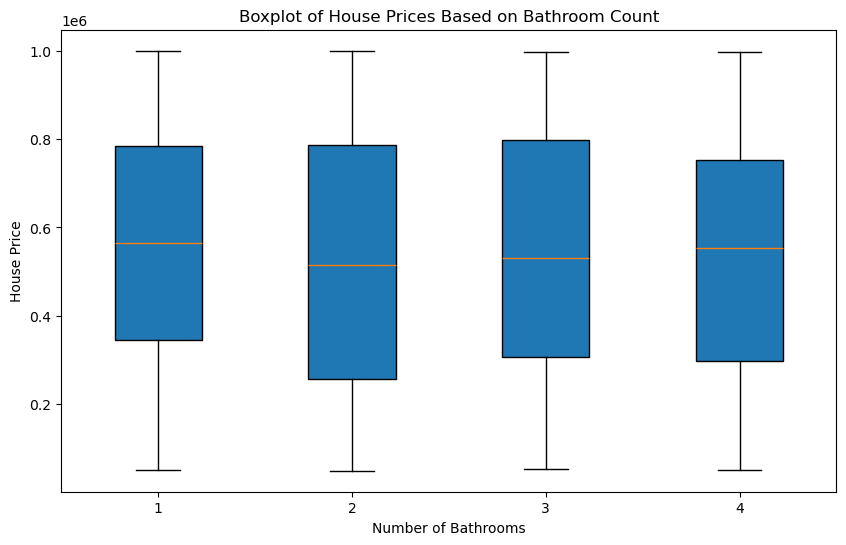

In [18]:
# Prepare data for boxplot: list of house prices based on bathroom count
bathroom_price_data = [house_data[house_data['Bathrooms'] == b]['Price'] for b in sorted(house_data['Bathrooms'].unique())]

# Plotting the boxplot for house prices based on bathroom count
plt.figure(figsize=(10, 6))
plt.boxplot(bathroom_price_data, labels=sorted(house_data['Bathrooms'].unique()), patch_artist=True)

# Add titles and labels
plt.title('Boxplot of House Prices Based on Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')

# Show the plot
plt.show()


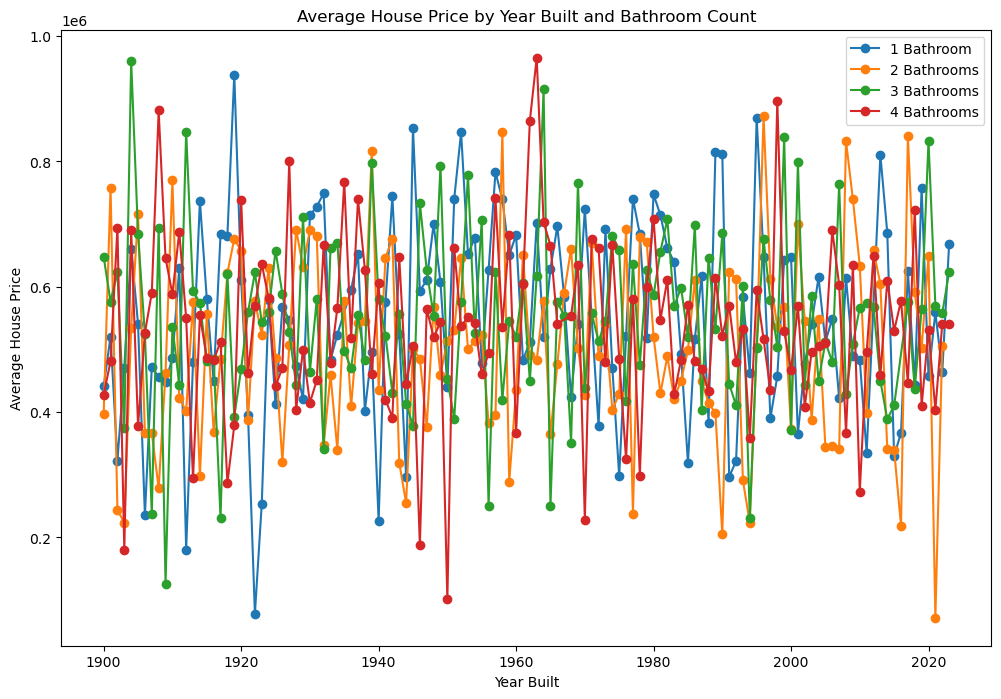

In [19]:
# Calculate the average house price by year built for each bathroom category
avg_price_by_year_bathroom = house_data.groupby(['YearBuilt', 'Bathrooms'])['Price'].mean().reset_index()

# Filter data for houses based on bathroom count
bathroom_1 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 1]
bathroom_2 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 2]
bathroom_3 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 3]
bathroom_4 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 4]

# Plotting the line plot
plt.figure(figsize=(12, 8))
plt.plot(bathroom_1['YearBuilt'], bathroom_1['Price'], label='1 Bathroom', marker='o')
plt.plot(bathroom_2['YearBuilt'], bathroom_2['Price'], label='2 Bathrooms', marker='o')
plt.plot(bathroom_3['YearBuilt'], bathroom_3['Price'], label='3 Bathrooms', marker='o')
plt.plot(bathroom_4['YearBuilt'], bathroom_4['Price'], label='4 Bathrooms', marker='o')

# Add titles and labels
plt.title('Average House Price by Year Built and Bathroom Count')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()


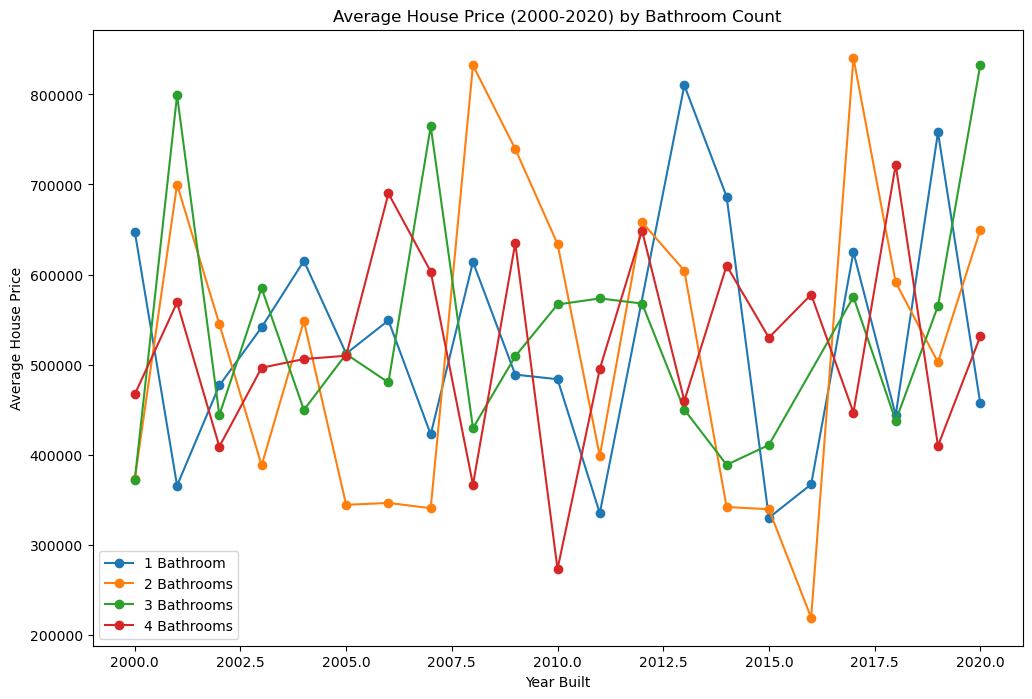

In [43]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year_bathroom[(avg_price_by_year_bathroom['YearBuilt'] >= 2000) & (avg_price_by_year_bathroom['YearBuilt'] <= 2020)]

# Filter for houses with different bathroom counts
early_bathroom_1 = early_data[early_data['Bathrooms'] == 1]
early_bathroom_2 = early_data[early_data['Bathrooms'] == 2]
early_bathroom_3 = early_data[early_data['Bathrooms'] == 3]
early_bathroom_4 = early_data[early_data['Bathrooms'] == 4]

# Plotting the line plot for early years
plt.figure(figsize=(12, 8))
plt.plot(early_bathroom_1['YearBuilt'], early_bathroom_1['Price'], label='1 Bathroom', marker='o')
plt.plot(early_bathroom_2['YearBuilt'], early_bathroom_2['Price'], label='2 Bathrooms', marker='o')
plt.plot(early_bathroom_3['YearBuilt'], early_bathroom_3['Price'], label='3 Bathrooms', marker='o')
plt.plot(early_bathroom_4['YearBuilt'], early_bathroom_4['Price'], label='4 Bathrooms', marker='o')

# Add titles and labels
plt.title('Average House Price (2000-2020) by Bathroom Count')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()


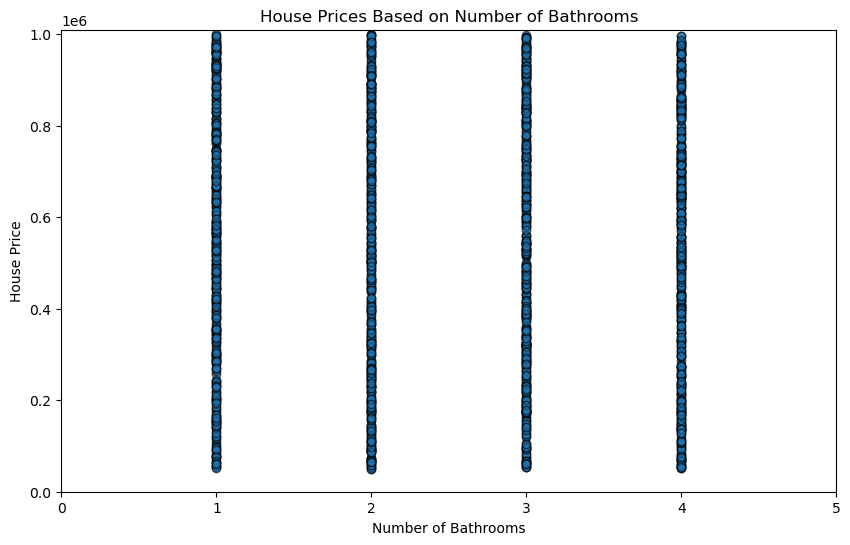

In [21]:
# Prepare the scatter plot data based on the number of bathrooms
x_values = house_data['Bathrooms']
y_values = house_data['Price']

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor='black')

# Set the upper and lower limits of y-axis
plt.ylim(0, house_data['Price'].max() + 10000)

# Set the upper and lower limits of x-axis
plt.xlim(0, house_data['Bathrooms'].max() + 1)

# Add a title, x label, and y label for the chart
plt.title('House Prices Based on Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')

# Show the plot
plt.show()


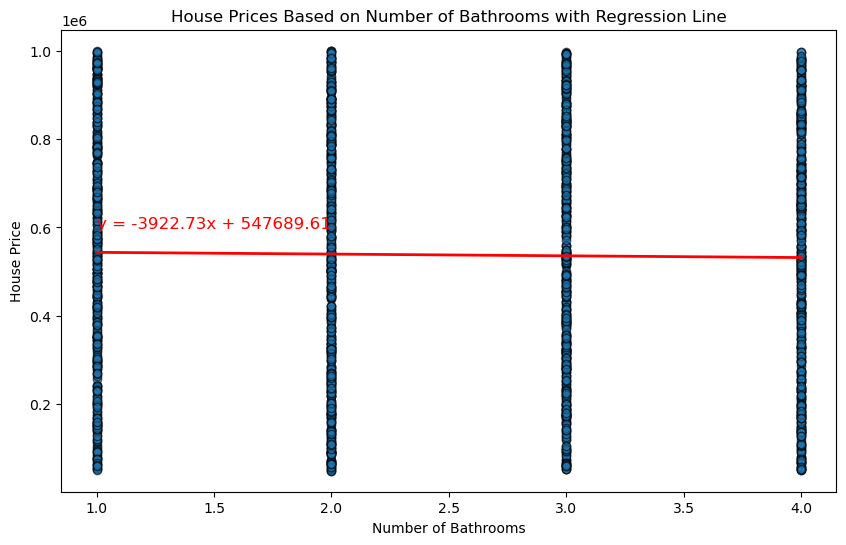

Correlation Coefficient: -0.02


In [23]:
# Encode 'Bathroom' count as numerical values for regression analysis
bathroom_encoded = house_data['Bathrooms'].values.reshape(-1, 1)
price = house_data['Price'].values

# Perform linear regression
model = LinearRegression()
model.fit(bathroom_encoded, price)

# Calculate the regression line values
regression_line = model.predict(bathroom_encoded)

# Create the equation of the line for display
slope = model.coef_[0]
intercept = model.intercept_
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(house_data['Bathrooms'], house_data['Price'], alpha=0.6, edgecolor='black')

# Plot the linear regression line
plt.plot(house_data['Bathrooms'], regression_line, color='red', linewidth=2)

# Annotate the linear regression equation on the plot
plt.text(1, intercept + 50000, equation, fontsize=12, color='red')

# Add titles and labels
plt.title('House Prices Based on Number of Bathrooms with Regression Line')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')

# Show the plot
plt.show()

# Print correlation coefficient
correlation_coefficient = np.corrcoef(house_data['Bathrooms'], house_data['Price'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
# Print correlation coefficient


In [46]:
# Separate house prices based on bathroom count
prices_1_bath = house_data[house_data['Bathrooms'] == 1]['Price']
prices_2_bath = house_data[house_data['Bathrooms'] == 2]['Price']
prices_3_bath = house_data[house_data['Bathrooms'] == 3]['Price']
prices_4_bath = house_data[house_data['Bathrooms'] == 4]['Price']

# Perform a one-way ANOVA test to compare the mean prices between the groups
anova_result = f_oneway(prices_1_bath, prices_2_bath, prices_3_bath, prices_4_bath)
print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA test result: F-statistic = 1.8722074371057578, p-value = 0.13219749577361628


In [47]:
# Calculate observed data: count of houses based on bathroom count
observed_data = house_data['Bathrooms'].value_counts().sort_index()

# Create a DataFrame for better visualization
df = pd.DataFrame(observed_data)

# Add a column for expected values (assuming equal distribution)
df['expected'] = observed_data.mean()

# Rename the columns
df.columns = ["observed", "expected"]

# View the DataFrame
df

,observed,expected
Bathrooms,,
1,461,500.0
2,494,500.0
3,524,500.0
4,521,500.0


In [48]:
# Calculate the critical value at 95% confidence level with 1 degree of freedom
critical_value = st.chi2.ppf(q=0.95, df=3)

# Print the critical value
print(f"The critical value: {critical_value}")


The critical value: 7.8147279032511765


In [49]:
# Run the Chi-Square test
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=5.148, pvalue=0.16127514928418124)

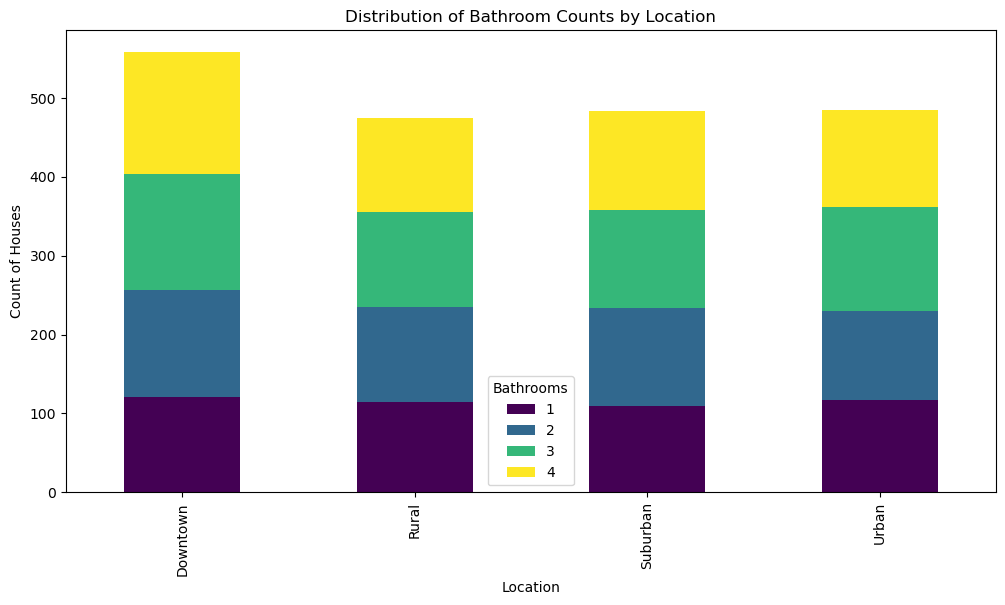

In [39]:
# Group data by 'Location' and 'Bathroom' to see distribution
bathroom_by_location = house_data.groupby(['Location', 'Bathrooms']).size().unstack()

# Plotting a stacked bar chart to visualize bathroom counts by location
bathroom_by_location.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Bathroom Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count of Houses')
plt.legend(title='Bathrooms')
plt.show()




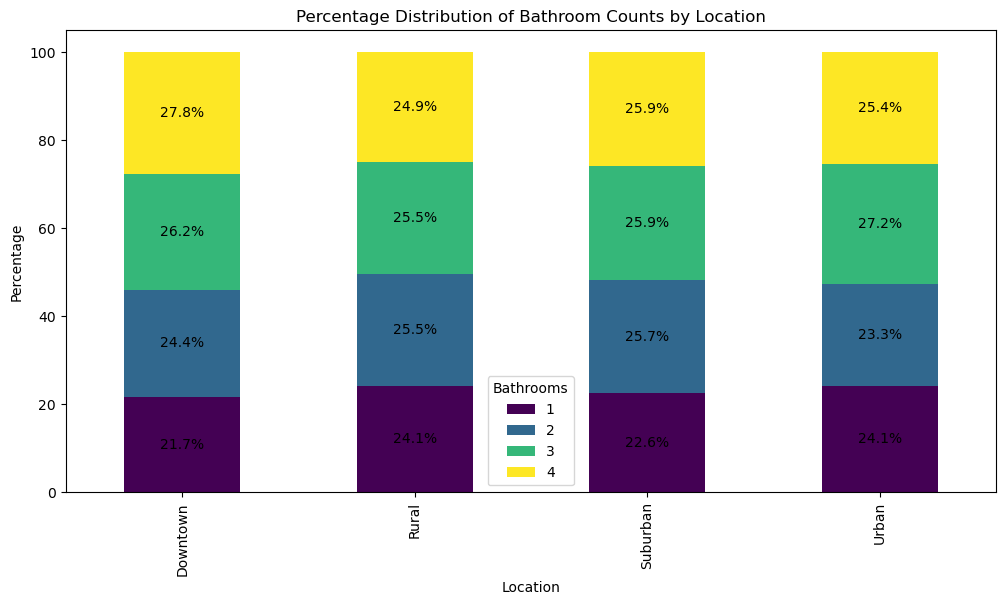

In [40]:
# Calculate percentage distribution of bathrooms counts by location
bathroom_by_location_pct = bathroom_by_location.div(bathroom_by_location.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
ax = bathroom_by_location_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Percentage Distribution of Bathroom Counts by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only show non-zero values
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.show()



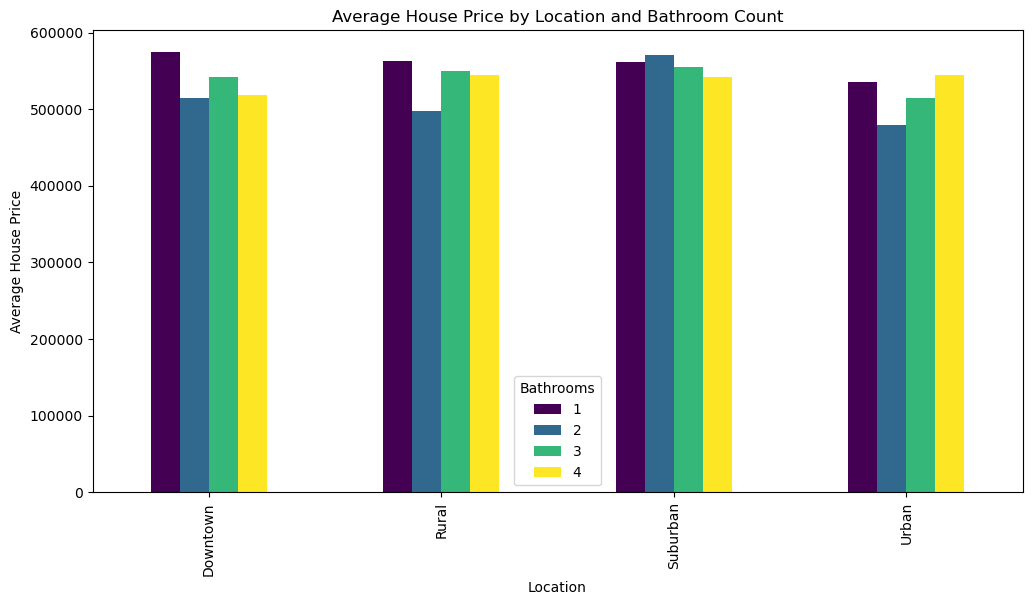

In [41]:
# Group by location and bathroom counts to calculate average prices
avg_price_by_location_bathroom = house_data.groupby(['Location', 'Bathrooms'])['Price'].mean().unstack()

# Plot the average house price by location and bathroom counts
avg_price_by_location_bathroom.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average House Price by Location and Bathroom Count')
plt.xlabel('Location')
plt.ylabel('Average House Price')
plt.legend(title='Bathrooms')
plt.show()
